<a href="https://colab.research.google.com/github/wahyudi0018/PCVK_Ganjil_2024/blob/main/Modul7_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Wahyudi**

**Kelas : TI-3C**

**No. Absen : 26**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Tugas 1: Membuat Image Filter untuk Average filter, low pass filter, high pass filter dan beberapa filter

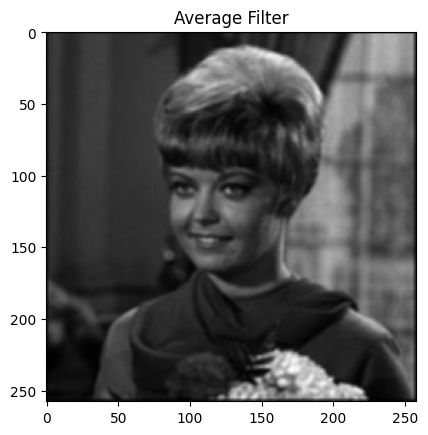

In [4]:
#average filter
kernel_average_filter = np.array([[1, 1, 1],
                                  [1, 1, 1],
                                  [1, 1, 1]])/9

plt.title('Average Filter')
result = convolution2d(img_gray, kernel_average_filter, 1, 2)

plt.imshow(result, cmap='gray')

plt.show()

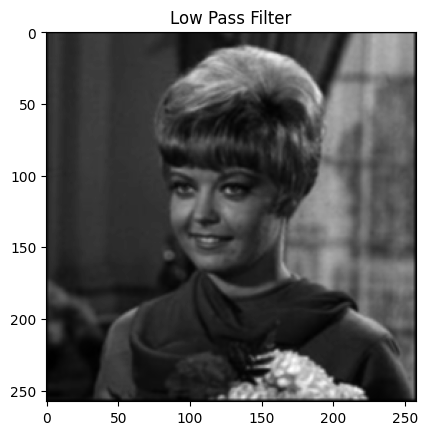

In [5]:
#low pass filter
kernel_low_pass_filter = np.array([[1, 1, 1],
                                   [1, 4, 1],
                                   [1, 1, 1]])/12

plt.title('Low Pass Filter')
result = convolution2d(img_gray, kernel_low_pass_filter, 1, 2)

plt.imshow(result, cmap='gray')

plt.show()

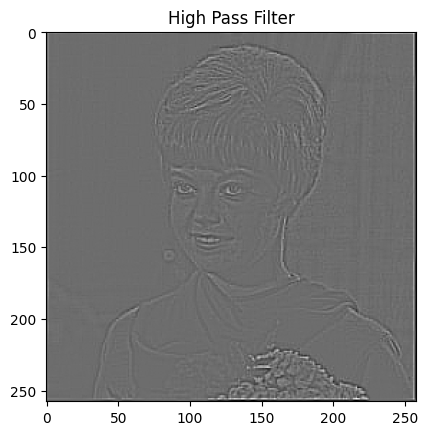

In [6]:
#high pass filter
kernel_high_pass_filter = np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]])
plt.title('High Pass Filter')
result = convolution2d(img_gray, kernel_high_pass_filter, 1, 2)

plt.imshow(result, cmap='gray')

plt.show()

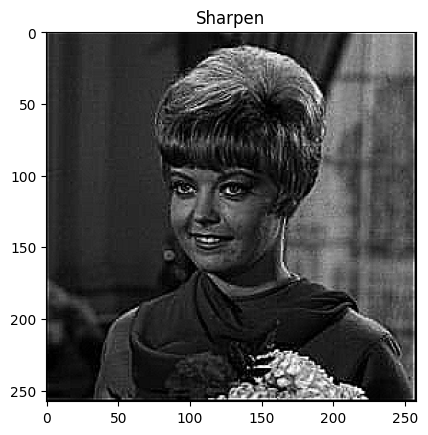

In [10]:
#sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

img_conv = convolution2d(img_gray, kernel_sharpen, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Sharpen')
plt.imshow(img_conv_norm,cmap='gray')

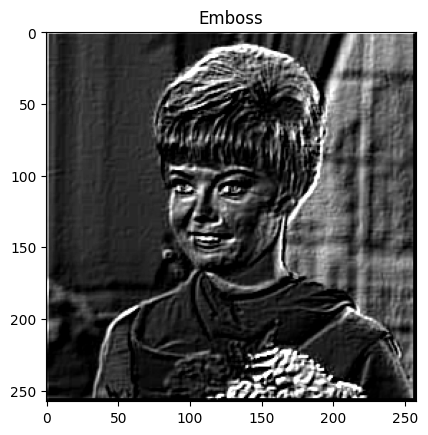

In [11]:
#emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

img_conv = convolution2d(img_gray, kernel_emboss, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Emboss')
plt.imshow(img_conv_norm,cmap='gray')

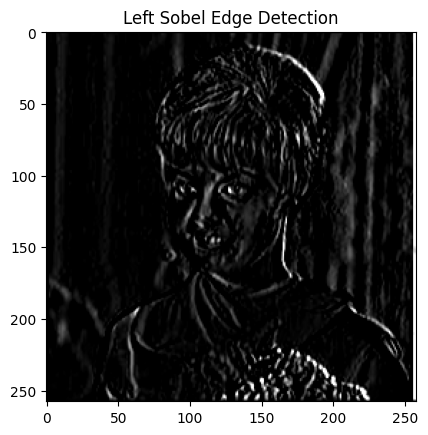

In [13]:
#left sobel edge detection
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

img_conv = convolution2d(img_gray, kernel_sobel, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Left Sobel Edge Detection')
plt.imshow(img_conv_norm,cmap='gray')

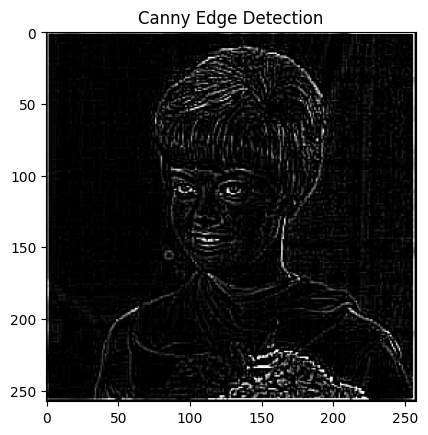

In [14]:
#canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

img_conv = convolution2d(img_gray, kernel_canny, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Canny Edge Detection')
plt.imshow(img_conv_norm,cmap='gray')

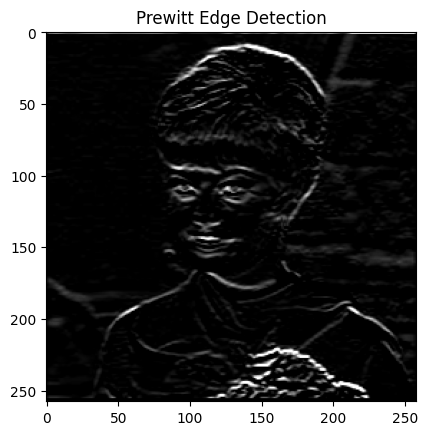

In [15]:
#prewitt edge detection
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

img_conv = convolution2d(img_gray, kernel_prewitt, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.title('Prewitt Edge Detection')
plt.imshow(img_conv_norm,cmap='gray')

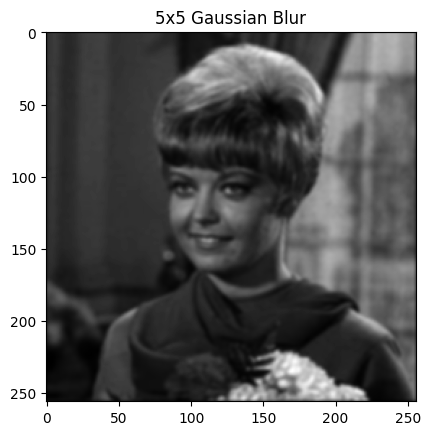

In [16]:
# 5x5 gaussian blur
gaussian_5 = np.array([[1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]])/256

plt.title('5x5 Gaussian Blur')
result = convolution2d(img_gray, gaussian_5, 1, 2)

plt.imshow(result, cmap='gray')

plt.show()

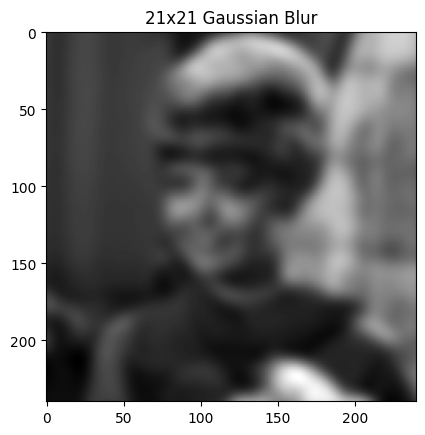

In [17]:
# 21x21 gaussian blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

plt.title('21x21 Gaussian Blur')
result = convolution2d(img_gray, gauss_kernel, 1, 2)

plt.imshow(result, cmap='gray')

plt.show()